In [22]:
import missingno as msno # 결측치 시각화
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import mpl_toolkits.basemap as bm


In [23]:
# !pip install cftime
# !pip install cartopy
# !pip install missingno
# !pip install basemap
# !pip install xarray

In [24]:
# NetCDF 파일 열기
target = xr.open_dataset('./iod.nc', decode_times=False)
df1 = xr.open_dataset('./sst.anom.mon.mean.nc', decode_times=False)
df2 = xr.open_dataset('./precip.anom.mon.mean.nc', decode_times=False)
df3 = xr.open_dataset('./uwnd.10m.anom.mon.mean.nc', decode_times=False)
df4 = xr.open_dataset('./vwnd.10m.anom.mon.mean.nc', decode_times=False)

c:\Users\chwo6\AppData\Local\anaconda3\envs\tensor2.10.0\lib\site-packages\xarray\coding\times.py:167: SerializationWarning:

Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.



In [25]:
df1

<xarray.Dataset>
Dimensions:  (time: 499, lon: 360, lat: 180)
Coordinates:
  * time     (time) float64 1.737e+07 1.737e+07 ... 1.773e+07 1.773e+07
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Aug 25 15:39:59 2023: cdo -f nc import_binary sst.anom....
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [26]:
# xarray DataArray를 Pandas DataFrame으로 변환하고 인덱스를 재설정합니다
df_target = target.to_dataframe().reset_index()
df_sst = df1.to_dataframe().reset_index()
df_precip = df2.to_dataframe().reset_index()
df_uwnd = df3.to_dataframe().reset_index()
df_vwnd = df4.to_dataframe().reset_index()

In [27]:
df_uwnd

,time,lon,lat,lev,uwnd
0,17365128.0,0.000,-88.5420,10.0,0.299840
1,17365128.0,0.000,-86.6531,10.0,1.944643
2,17365128.0,0.000,-84.7532,10.0,2.084280
3,17365128.0,0.000,-82.8508,10.0,1.103399
4,17365128.0,0.000,-80.9473,10.0,0.171486
...,...,...,...,...,...
9005947,17728872.0,358.125,80.9473,10.0,0.310204
9005948,17728872.0,358.125,82.8508,10.0,0.387655
9005949,17728872.0,358.125,84.7532,10.0,0.596672
9005950,17728872.0,358.125,86.6531,10.0,1.241549


In [28]:
df_sst

,time,lon,lat,sst
0,17365128.0,0.0,-89.5,NaN
1,17365128.0,0.0,-88.5,NaN
2,17365128.0,0.0,-87.5,NaN
3,17365128.0,0.0,-86.5,NaN
4,17365128.0,0.0,-85.5,NaN
...,...,...,...,...
32335195,17728872.0,359.0,85.5,-0.396877
32335196,17728872.0,359.0,86.5,-0.387746
32335197,17728872.0,359.0,87.5,-0.406135
32335198,17728872.0,359.0,88.5,-0.377264


In [29]:
# 서인도양 필터링
df_WITO_sst = df_sst[
    (df_sst['lon'] >= 50) & (df_sst['lon'] <= 70) &
    (df_sst['lat'] >= -10) & (df_sst['lat'] <= 10)
]

# 남동인도양 필터링
df_SETIO_sst = df_sst[
    (df_sst['lon'] >= 90) & (df_sst['lon'] <= 110) &
    (df_sst['lat'] >= -10) & (df_sst['lat'] <= 0)
]

# 서인도양 필터링
df_WITO_precip = df_precip[
    (df_precip['lon'] >= 50) & (df_precip['lon'] <= 70) &
    (df_precip['lat'] >= -10) & (df_precip['lat'] <= 10)
]

# 남동인도양 필터링
df_SETIO_precip = df_precip[
    (df_precip['lon'] >= 90) & (df_precip['lon'] <= 110) &
    (df_precip['lat'] >= -10) & (df_precip['lat'] <= 0)
]

# 서인도양 필터링
df_WITO_precip = df_uwnd[
    (df_uwnd['lon'] >= 50) & (df_uwnd['lon'] <= 70) &
    (df_uwnd['lat'] >= -10) & (df_uwnd['lat'] <= 10)
]

# 남동인도양 필터링
df_SETIO_precip = df_uwnd[
    (df_uwnd['lon'] >= 90) & (df_uwnd['lon'] <= 110) &
    (df_uwnd['lat'] >= -10) & (df_uwnd['lat'] <= 0)
]

# 서인도양 필터링
df_WITO_uwnd = df_uwnd[
    (df_uwnd['lon'] >= 50) & (df_uwnd['lon'] <= 70) &
    (df_uwnd['lat'] >= -10) & (df_uwnd['lat'] <= 10)
]

# 남동인도양 필터링
df_SETIO_vwnd = df_vwnd[
    (df_vwnd['lon'] >= 90) & (df_vwnd['lon'] <= 110) &
    (df_vwnd['lat'] >= -10) & (df_vwnd['lat'] <= 0)
]

In [30]:
# # 결측치가 어디에 존재하는지 분포를 확인할 수 있습니다
# fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# msno.matrix(df=df_WITO_sst, ax=ax[0], color=(0.8, 0.5, 0.2))
# ax[0].set_title("Missing Data in df_WITO_sst")

# msno.matrix(df=df_SETIO_sst, ax=ax[1], color=(0.8, 0.5, 0.2))
# ax[1].set_title("Missing Data in df_SETIO_sst")

# plt.tight_layout()
# plt.show()

In [31]:
# 결측치 채우기 함수
def fill_missing(df_input, shift_max):
    df = df_input.copy()

    for shift_num in range(1, shift_max+1):

        df[f'sst_lat_before{shift_num}'] = df.groupby(['time', 'lon'])['sst'].shift(shift_num)
        df[f'sst_lat_after{shift_num}'] = df.groupby(['time', 'lon'])['sst'].shift(-shift_num)
        df[f'sst_lon_before{shift_num}'] = df.groupby(['time', 'lat'])['sst'].shift(shift_num)
        df[f'sst_lon_after{shift_num}'] = df.groupby(['time', 'lat'])['sst'].shift(-shift_num)

        df['sst'].fillna(df[f'sst_lat_before{shift_num}'], inplace=True)
        df['sst'].fillna(df[f'sst_lat_after{shift_num}'], inplace=True)
        df['sst'].fillna(df[f'sst_lon_before{shift_num}'], inplace=True)
        df['sst'].fillna(df[f'sst_lon_after{shift_num}'], inplace=True)

        df.drop([f'sst_lat_before{shift_num}', f'sst_lat_after{shift_num}', f'sst_lon_before{shift_num}', f'sst_lon_after{shift_num}'], axis=1, inplace=True)

        missing_values = df['sst'].isna().sum()

        if missing_values == 0:
            return df, shift_num

    return df, shift_max

# 최대 shift를 10으로 가정
df_WITO_sst, max_shifts_needed1 = fill_missing(df_WITO_sst, 10)
df_SETIO_sst, max_shifts_needed2 = fill_missing(df_SETIO_sst, 10)

print(f"WITO 최대로 필요한 shift 횟수: {max_shifts_needed1}")
print(f"SETIO 최대로 필요한 shift 횟수: {max_shifts_needed2}")

WITO 최대로 필요한 shift 횟수: 1
SETIO 최대로 필요한 shift 횟수: 2


In [39]:
df_SETIO_sst.head(30)

,time,lon,lat,sst
32286680,17728872.0,90.0,-9.5,0.210784
32286681,17728872.0,90.0,-8.5,0.100151
32286682,17728872.0,90.0,-7.5,0.015372
32286683,17728872.0,90.0,-6.5,0.096935
32286684,17728872.0,90.0,-5.5,0.145613
32286685,17728872.0,90.0,-4.5,0.187132
32286686,17728872.0,90.0,-3.5,0.254027
32286687,17728872.0,90.0,-2.5,0.471248
32286688,17728872.0,90.0,-1.5,0.561900
32286689,17728872.0,90.0,-0.5,0.468243


In [33]:
df_unique_time = df_SETIO_sst.drop_duplicates(subset='time')

print(df_unique_time)

                time   lon  lat       sst
16280     17365128.0  90.0 -9.5  0.115345
81080     17365872.0  90.0 -9.5 -1.235873
145880    17366544.0  90.0 -9.5 -1.217713
210680    17367288.0  90.0 -9.5 -1.152441
275480    17368008.0  90.0 -9.5 -0.481460
...              ...   ...  ...       ...
32027480  17725944.0  90.0 -9.5 -0.059888
32092280  17726688.0  90.0 -9.5  0.354643
32157080  17727408.0  90.0 -9.5  0.225203
32221880  17728152.0  90.0 -9.5  0.730517
32286680  17728872.0  90.0 -9.5  0.210784

[499 rows x 4 columns]


In [34]:
# from mpl_toolkits.basemap import Basemap

# # 특정 시간에 대한 데이터 필터링
# time_filter = 17365128.0
# df_filtered_time = df_sst[df_sst['time'] == time_filter]



# # WITO와 SETIO 영역의 데이터를 특정 시간에 대해 필터링된 데이터에서 추출
# df_WITO_sst = df_filtered_time[
#     (df_filtered_time['lon'] >= 50) & (df_filtered_time['lon'] <= 70) &
#     (df_filtered_time['lat'] >= -10) & (df_filtered_time['lat'] <= 10)
# ]
# df_SETIO_sst = df_filtered_time[
#     (df_filtered_time['lon'] >= 90) & (df_filtered_time['lon'] <= 110) &
#     (df_filtered_time['lat'] >= -10) & (df_filtered_time['lat'] <= 0)
# ]

# # SST 데이터를 해당 영역에 플로팅하는 함수
# def plot_sst_on_region(df, region_name):
#     lons = df['lon'].values
#     lats = df['lat'].values
#     sst = df['sst'].values

#     lon, lat = np.meshgrid(np.unique(lons), np.unique(lats))
#     sst_grid = sst.reshape(len(np.unique(lats)), len(np.unique(lons)))

#     contour = m.contourf(lon, lat, sst_grid, np.arange(-2.5, 3, 0.5), cmap='RdBu_r', extend='both', latlon=True)
#     return contour

# # Create a basemap object
# m = Basemap(projection='cyl', resolution='l', llcrnrlat=-30, urcrnrlat=30, llcrnrlon=40, urcrnrlon=120)
# m.drawcoastlines()
# m.drawmapboundary(fill_color='white')
# m.drawcountries()

# # Plot SST data on WITO and SETIO regions
# contour = plot_sst_on_region(df_WITO_sst, 'WITO')
# plot_sst_on_region(df_SETIO_sst, 'SETIO')

# # Highlight the WITO and SETIO regions with black rectangles
# m.plot([50, 70, 70, 50, 50], [-10, -10, 10, 10, -10], color='black', latlon=True)  # WITO
# m.plot([90, 110, 110, 90, 90], [-10, -10, 0, 0, -10], color='black', latlon=True)  # SETIO

# # Add a colorbar
# cbar = m.colorbar(contour, location='right', pad="5%")
# cbar.set_label('Sea Surface Temperature (SST)')

# plt.title(f"Sea Surface Temperature (SST) for Time {time_filter}")
# plt.show()

In [35]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# SST 데이터를 해당 영역에 플로팅하는 함수 정의
def plot_sst_on_region(df, region_name):
    lons = df['lon'].values
    lats = df['lat'].values
    sst = df['sst'].values

    lon, lat = np.meshgrid(np.unique(lons), np.unique(lats))
    sst_grid = sst.reshape(len(np.unique(lats)), len(np.unique(lons)))

    contour = m.contourf(lon, lat, sst_grid, np.arange(-2.5, 3, 0.5), cmap='RdBu_r', extend='both', latlon=True)
    return contour

# Create a basemap object
m = Basemap(projection='cyl', resolution='l', llcrnrlat=-30, urcrnrlat=30, llcrnrlon=40, urcrnrlon=120)
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.drawcountries()

# 각 시간 값에 대해 루프 수행
for time_filter in df_sst['time'].unique():
    # Create a new figure for each time step
    plt.figure()

    # Create a basemap object for this figure
    m = Basemap(projection='cyl', resolution='l', llcrnrlat=-30, urcrnrlat=30, llcrnrlon=40, urcrnrlon=120)
    m.drawcoastlines()
    m.drawmapboundary(fill_color='white')
    m.drawcountries()

    # Filter data for the current time
    df_filtered_time = df_sst[df_sst['time'] == time_filter]

    # Check if data exists for WITO and SETIO regions
    if not df_filtered_time.empty:
        # WITO and SETIO region data
        df_WITO_sst = df_filtered_time[
            (df_filtered_time['lon'] >= 50) & (df_filtered_time['lon'] <= 70) &
            (df_filtered_time['lat'] >= -10) & (df_filtered_time['lat'] <= 10)
        ]
        df_SETIO_sst = df_filtered_time[
            (df_filtered_time['lon'] >= 90) & (df_filtered_time['lon'] <= 110) &
            (df_filtered_time['lat'] >= -10) & (df_filtered_time['lat'] <= 0)
        ]

        # Check if data exists for WITO and SETIO regions
        if not df_WITO_sst.empty and not df_SETIO_sst.empty:
            # Plot SST data on WITO and SETIO regions
            contour_WITO = plot_sst_on_region(df_WITO_sst, 'WITO')
            contour_SETIO = plot_sst_on_region(df_SETIO_sst, 'SETIO')

            # Highlight the WITO and SETIO regions with black rectangles
            m.plot([50, 70, 70, 50, 50], [-10, -10, 10, 10, -10], color='black', latlon=True)  # WITO
            m.plot([90, 110, 110, 90, 90], [-10, -10, 0, 0, -10], color='black', latlon=True)  # SETIO

            # Add a colorbar
            cbar_WITO = m.colorbar(contour_WITO, location='right', pad="5%")
            cbar_SETIO = m.colorbar(contour_SETIO, location='right', pad="5%")
            cbar_WITO.set_label('Sea Surface Temperature (SST)')
            cbar_SETIO.set_label('Sea Surface Temperature (SST)')

            plt.title(f"Sea Surface Temperature (SST) for Time {time_filter}")

            # Save the figure for each time value
            plt.savefig(f"./output_images/SST_image_{time_filter}.png", bbox_inches='tight')
            
            # Close the current figure to create a new one for the next time step
            plt.close()


# 그림 닫기
plt.close()


In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import pandas as pd  # 판다스 모듈 임포트

# 데이터 디렉토리 경로
data_dir = './output_images/'

# 하이퍼파라미터 설정
batch_size = 32
image_size = (150, 150)
num_classes = 2  # 클래스 수에 맞게 설정
num_epochs = 10

# 이미지 파일 목록 가져오기
data_files = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename.endswith(".png")]

# 레이블 생성: 예를 들어, 파일명에 따라 클래스를 부여하는 방법
labels = []
for filename in data_files:
    if "class_A" in filename:
        labels.append(0)  # 클래스 A에 해당하는 레이블
    else:
        labels.append(1)  # 클래스 B에 해당하는 레이블

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(data_files, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 데이터 생성기 생성
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': x_train, 'class': [str(cls) for cls in y_train]}),
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': x_val, 'class': [str(cls) for cls in y_val]}),
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# 수정: test_generator도 데이터프레임으로 생성
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# 정수 값을 문자열로 변환하여 사용
test_generator = test_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': x_test, 'class': [str(cls) for cls in y_test]}),
    x_col='filename',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


# CNN 모델 생성 (이전에 제공한 코드와 동일)
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# 모델 컴파일 (이전에 제공한 코드와 동일)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습 (이전에 제공한 코드와 동일)
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=validation_generator,
    validation_steps=len(x_val) // batch_size,
    epochs=num_epochs
)

# 모델 평가 (이전에 제공한 코드와 동일)
test_loss, test_acc = model.evaluate(test_generator, steps=len(x_test) // batch_size)
print(f"Test accuracy: {test_acc}")


Found 319 validated image filenames belonging to 1 classes.


Found 80 validated image filenames belonging to 1 classes.
Found 100 validated image filenames belonging to 1 classes.
Epoch 1/10
9/9 [==============================] - 3s 334ms/step - loss: 10.2737 - accuracy: 0.5556 - val_loss: 6.3735 - val_accuracy: 0.0000e+00
Epoch 2/10
9/9 [==============================] - 2s 165ms/step - loss: 250.3340 - accuracy: 0.5575 - val_loss: 230.8170 - val_accuracy: 0.0000e+00
Epoch 3/10
9/9 [==============================] - 2s 189ms/step - loss: 1407.9645 - accuracy: 0.3345 - val_loss: 6230.9004 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 2s 174ms/step - loss: 6377.2588 - accuracy: 0.6655 - val_loss: 2948.8887 - val_accuracy: 0.0000e+00
Epoch 5/10
9/9 [==============================] - 2s 187ms/step - loss: 15867.0996 - accuracy: 0.4425 - val_loss: 8346.6719 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 2s 174ms/step - loss: 45964.9727 - accuracy: 0.4444 - val_loss: 25306.4062 - val_accuracy: 1.00

In [37]:
# ! pip install --upgrade nbformat

In [38]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

df_SETIO_sst.columns = df_SETIO_sst.columns.str.replace('[+.]', '', regex=True) # 시각 화 시키면 기존  df_combined 데이터 프레임의 NINO1+2 은 NINO12 로 바뀜

basic = [False] * len(df_SETIO_sst.columns)


fig = go.Figure()


for col in df_SETIO_sst.columns:
    trace = go.Scatter(x=df_SETIO_sst.index, y=df_SETIO_sst[col], name=col, visible=False)
    fig.add_trace(trace)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

buttons = []
for i, col in enumerate(df_SETIO_sst.columns):
    buttons.append(
        dict(
            label=col,
            method="update",
            args=[{"visible": [i == j for j in range(len(df_SETIO_sst.columns))]}, {"title": col}],
        )
    )


fig.update_layout(updatemenus=[{"buttons": buttons, "direction": "down", "showactive": True}])


for i, col in enumerate(df_SETIO_sst.columns):
    basic[i] = False


fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

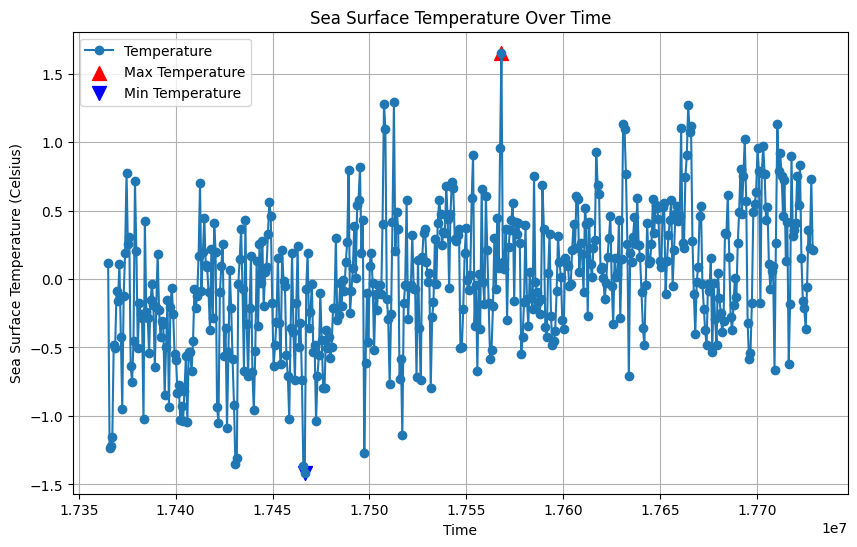

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

df = df_unique_time

# 시간에 따른 최고 온도와 최저 온도 데이터 추출
max_temp = df[df['sst'] == df['sst'].max()]
min_temp = df[df['sst'] == df['sst'].min()]

# 그래프 작성
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['sst'], marker='o', linestyle='-', label='Temperature')
plt.scatter(max_temp['time'], max_temp['sst'], color='red', label='Max Temperature', marker='^', s=100)
plt.scatter(min_temp['time'], min_temp['sst'], color='blue', label='Min Temperature', marker='v', s=100)

plt.title('Sea Surface Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature (Celsius)')
plt.legend()
plt.grid()

plt.show()


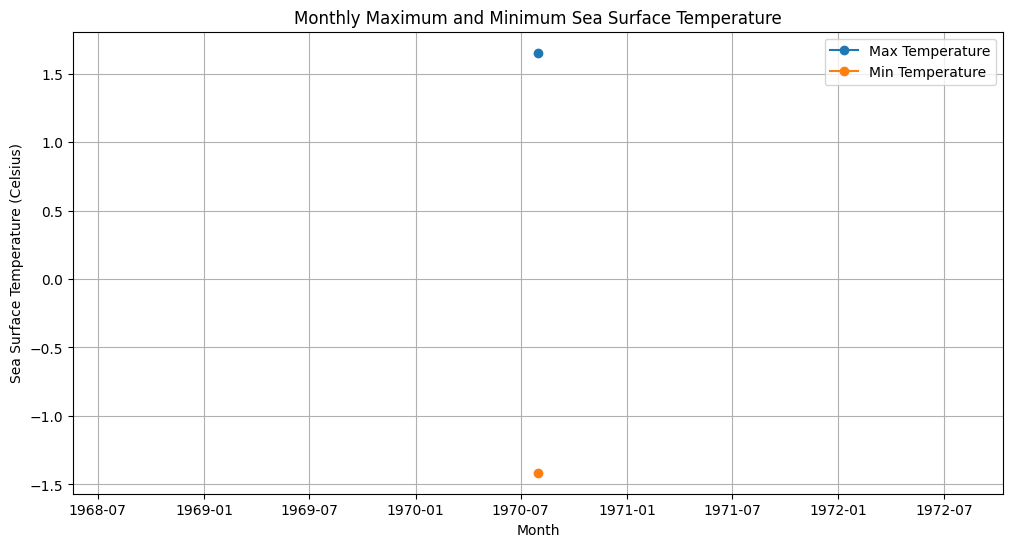

In [47]:
import matplotlib.pyplot as plt
import pandas as pd



# 시간 데이터를 날짜로 변환
df['date'] = pd.to_datetime(df['time'], unit='s')

# 월별로 그룹화하여 각 월의 최고 온도와 최저 온도 계산
monthly_max_temp = df.resample('M', on='date')['sst'].max()
monthly_min_temp = df.resample('M', on='date')['sst'].min()

# 그래프 작성
plt.figure(figsize=(12, 6))
plt.plot(monthly_max_temp.index, monthly_max_temp, marker='o', linestyle='-', label='Max Temperature')
plt.plot(monthly_min_temp.index, monthly_min_temp, marker='o', linestyle='-', label='Min Temperature')

plt.title('Monthly Maximum and Minimum Sea Surface Temperature')
plt.xlabel('Month')
plt.ylabel('Sea Surface Temperature (Celsius)')
plt.legend()
plt.grid()

plt.show()


In [50]:
df.head(300)

,time,lon,lat,sst,date
16280,17365128.0,90.0,-9.5,0.115345,1970-07-20 23:38:48
81080,17365872.0,90.0,-9.5,-1.235873,1970-07-20 23:51:12
145880,17366544.0,90.0,-9.5,-1.217713,1970-07-21 00:02:24
210680,17367288.0,90.0,-9.5,-1.152441,1970-07-21 00:14:48
275480,17368008.0,90.0,-9.5,-0.481460,1970-07-21 00:26:48
...,...,...,...,...,...
19132280,17580600.0,90.0,-9.5,0.397894,1970-07-23 11:30:00
19197080,17581344.0,90.0,-9.5,-0.142827,1970-07-23 11:42:24
19261880,17582064.0,90.0,-9.5,-0.344815,1970-07-23 11:54:24
19326680,17582808.0,90.0,-9.5,0.053150,1970-07-23 12:06:48
